In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# Checking the version of Tensorflow ans keras
print(f"Tensorflow version: {tf.__version__}")
# Check Keras version (assuming it's installed as part of TensorFlow)
print(f"Keras Version: {keras.__version__}")

Tensorflow version: 2.15.0
Keras Version: 2.15.0


In [3]:
os.getcwd()

'/content'

In [4]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU','CPU']
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out)>0:
      print(f"{device} is available")
      print(f"Details >> {out} ")
    else:
      print(f"{device} isn't available ")

GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] 


# Creating a samclassifier using keras on MNIST data

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [9]:
(X_train_full, y_train_full) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train_full[0].shape

(28, 28)

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [14]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28)


In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
# Create the validation data set from yhe full training data
# scale the data between 0 to 1 by divided it by 255, as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.0

# TRAIN = 55000
# TEST = 10000
# VALID = 5000

In [17]:
len(X_train_full[5000:])

55000

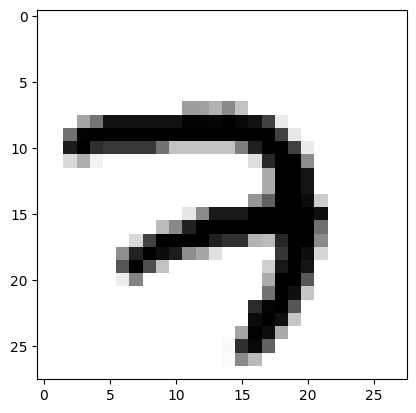

In [18]:
# Let view some data
plt.imshow(X_train[0], cmap="binary")

<Axes: >

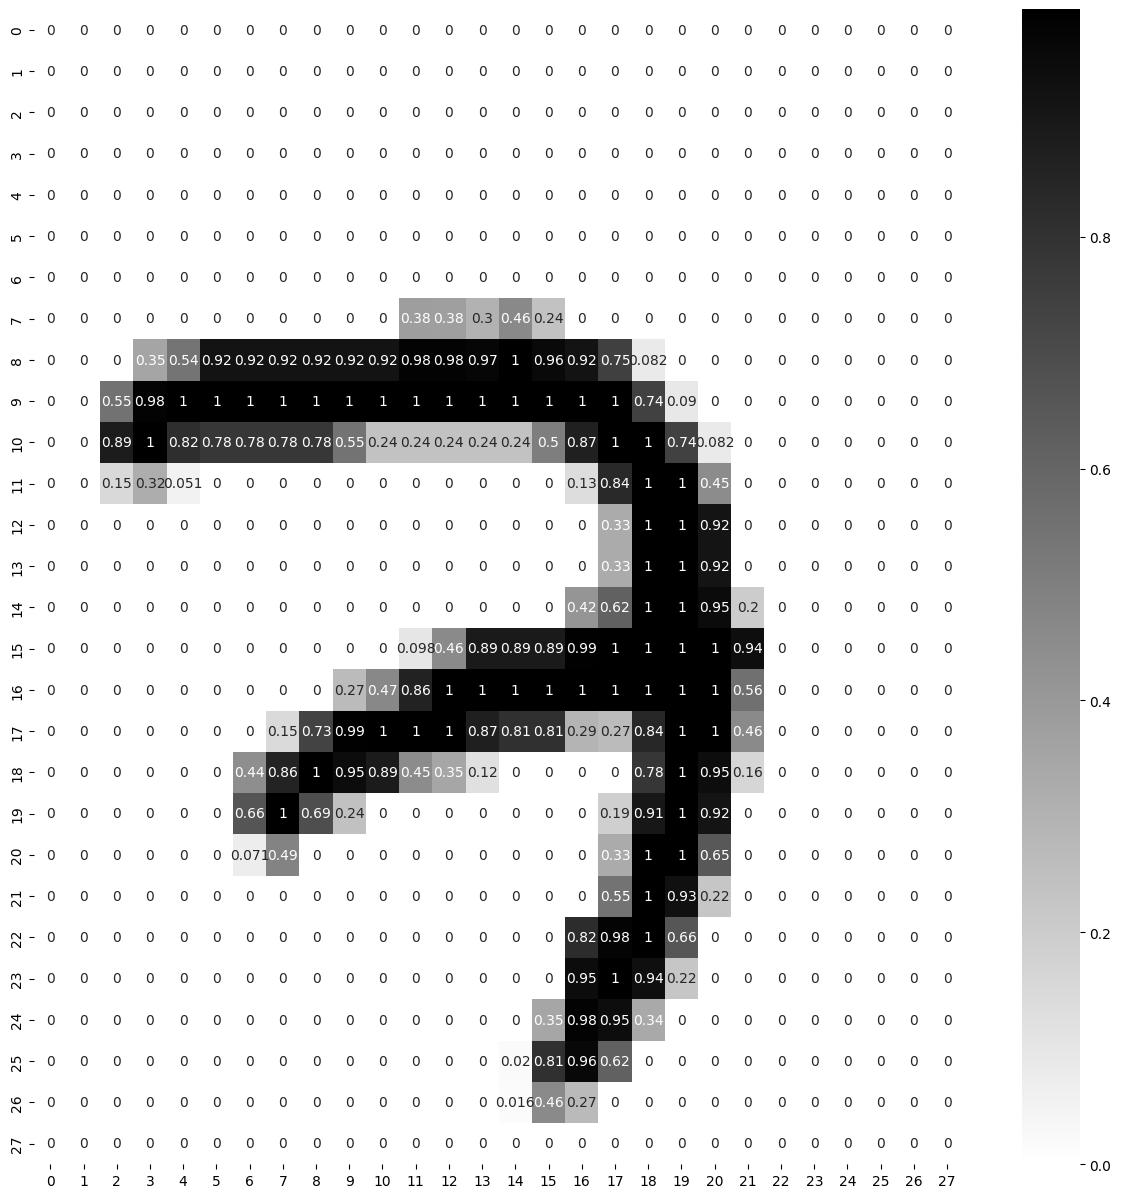

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True , cmap = 'binary')

In [20]:
28*28


784

In [21]:
# 10 output
# 1,2,3,4,5,6,7,8,9

In [22]:
# Creating layers of ANN
LAYERS =  [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
           tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
           tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
           tf.keras.layers.Dense(10,  activation="softmax", name="outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
# Method-2

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# define the model
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# model.add(Dense(units=64, activation='relu'), input_dim=100)
# model.add(Dense(units=10, activation='softmax'))

# compile the model
# model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# train the model
# model.fit(X_train,y_train, epochs=5, batch_size=32)


In [23]:
model_clf.layers

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# firstLayer * secondLayer + bias
(784 * 300) + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [26]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [27]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [28]:
hidden1.get_weights()

[array([[-0.00601411,  0.01212615,  0.02154653, ..., -0.06725061,
          0.06745122, -0.0057534 ],
        [-0.05082972,  0.01123386,  0.06836787, ..., -0.02502627,
         -0.02838413, -0.00014082],
        [ 0.03269891,  0.06830731, -0.03478326, ...,  0.04338796,
          0.03685353,  0.00629832],
        ...,
        [-0.00264157,  0.03269443, -0.02046915, ..., -0.03785253,
         -0.04805369,  0.03082655],
        [-0.05023304,  0.0370219 , -0.0204272 , ..., -0.07027237,
          0.03703836, -0.01220194],
        [ 0.05613108,  0.0173156 ,  0.02487715, ...,  0.00843696,
         -0.02687122, -0.04697599]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
hidden1.get_weights()[0].shape

(784, 300)

In [30]:
hidden1.get_weights()[1].shape

(300,)

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights.shape

(784, 300)

In [33]:
biases.shape

(300,)

In [34]:
print("shape\n",biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
print("weights\n",weights.shape, "\n", weights)
weights

weights
 (784, 300) 
 [[-0.00601411  0.01212615  0.02154653 ... -0.06725061  0.06745122
  -0.0057534 ]
 [-0.05082972  0.01123386  0.06836787 ... -0.02502627 -0.02838413
  -0.00014082]
 [ 0.03269891  0.06830731 -0.03478326 ...  0.04338796  0.03685353
   0.00629832]
 ...
 [-0.00264157  0.03269443 -0.02046915 ... -0.03785253 -0.04805369
   0.03082655]
 [-0.05023304  0.0370219  -0.0204272  ... -0.07027237  0.03703836
  -0.01220194]
 [ 0.05613108  0.0173156   0.02487715 ...  0.00843696 -0.02687122
  -0.04697599]]


array([[-0.00601411,  0.01212615,  0.02154653, ..., -0.06725061,
         0.06745122, -0.0057534 ],
       [-0.05082972,  0.01123386,  0.06836787, ..., -0.02502627,
        -0.02838413, -0.00014082],
       [ 0.03269891,  0.06830731, -0.03478326, ...,  0.04338796,
         0.03685353,  0.00629832],
       ...,
       [-0.00264157,  0.03269443, -0.02046915, ..., -0.03785253,
        -0.04805369,  0.03082655],
       [-0.05023304,  0.0370219 , -0.0204272 , ..., -0.07027237,
         0.03703836, -0.01220194],
       [ 0.05613108,  0.0173156 ,  0.02487715, ...,  0.00843696,
        -0.02687122, -0.04697599]], dtype=float32)

In [36]:
LOSS_FUNCTIONS = ["sparse_categorical_crossentropy", "categorical_crossentropy"]  # USE => tf.losses.sparse_gorical_crossentropy
OPTIMIZERS = ["SGD"] # use cutom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTIONS[0], optimizer=OPTIMIZERS, metrics=METRICS)

In [39]:
# training
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)

    AttributeError: 'ListWrapper' object has no attribute 'minimize'


In [40]:
LOSS_FUNCTIONS = ["sparse_categorical_crossentropy", "categorical_crossentropy"]
# Use a string to select the loss function
OPTIMIZERS = ["SGD"]
# Instantiate the optimizer with desired learning rate
METRICS = ["accuracy"]

# Pass the optimizer instance, not the list
model_clf.compile(loss=LOSS_FUNCTIONS[0], optimizer=tf.keras.optimizers.SGD(0.02), metrics=METRICS)

# training - no changes required here
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.4739 - accuracy: 0.8715 - val_loss: 0.2427 - val_accuracy: 0.9284
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2315 - accuracy: 0.9337 - val_loss: 0.1890 - val_accuracy: 0.9472
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1761 - accuracy: 0.9491 - val_loss: 0.1504 - val_accuracy: 0.9582
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1419 - accuracy: 0.9595 - val_loss: 0.1263 - val_accuracy: 0.9638
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1176 - accuracy: 0.9663 - val_loss: 0.1101 - val_accuracy: 0.9686
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 0.1036 - val_accuracy: 0.9720
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9754 - val_loss: 0.0907 - val_accuracy:

In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.473877,0.871509,0.242658,0.9284
1,0.231451,0.933709,0.189015,0.9472
2,0.176066,0.949109,0.150427,0.9582
3,0.141896,0.959545,0.126251,0.9638
4,0.117649,0.966291,0.110130,0.9686
5,0.099942,0.970945,0.103575,0.9720
6,0.086419,0.975382,0.090663,0.9734
7,0.075387,0.978055,0.086401,0.9750
8,0.066075,0.981364,0.081072,0.9760
9,0.058634,0.983636,0.076614,0.9762


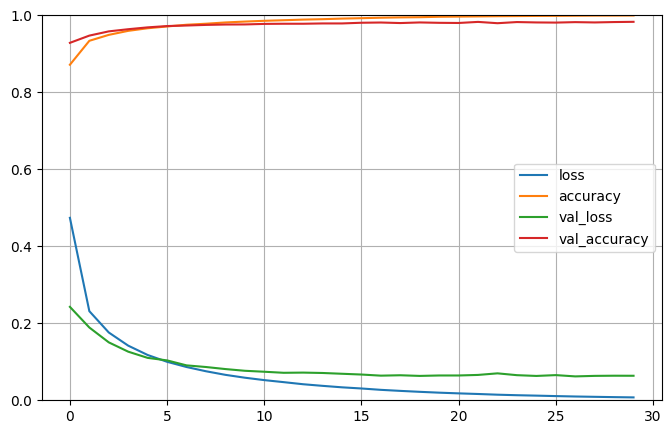

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<Axes: >

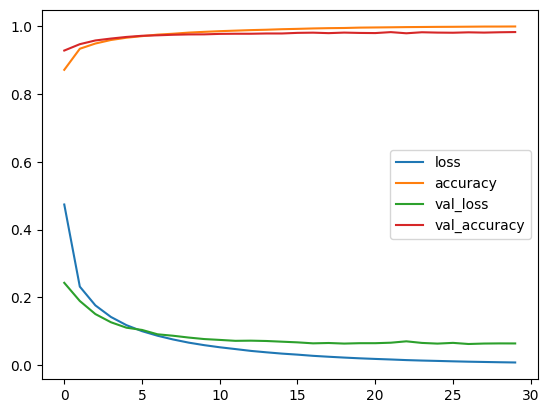

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9803


[0.06802068650722504, 0.9803000092506409]

**SAMPLE CHECK TEST DATA**

In [50]:
X_new = X_test[:3]
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

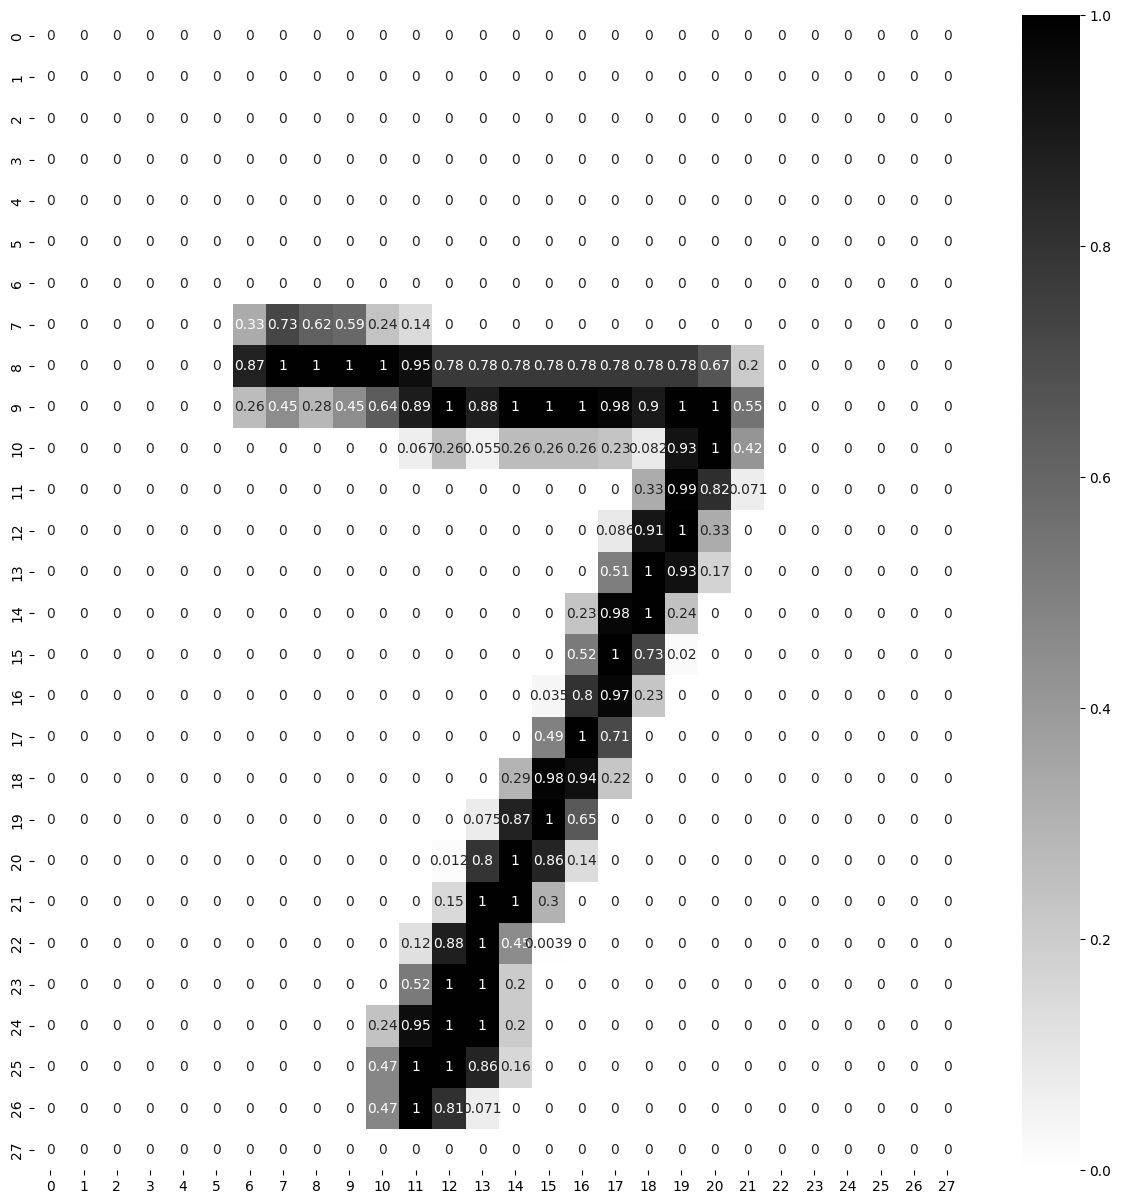

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(X_new[0], annot = True , cmap = 'binary')

In [51]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 116ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [53]:
y_prob

array([[8.5745135e-08, 5.0547044e-08, 8.5031952e-06, 5.1928061e-04,
        1.3017425e-09, 1.7151604e-07, 2.9201891e-14, 9.9946827e-01,
        6.3944850e-07, 3.1070977e-06],
       [4.2333408e-09, 3.9765487e-07, 9.9999905e-01, 5.9585460e-07,
        6.8653921e-16, 9.9973842e-11, 8.4868956e-09, 9.0733828e-13,
        5.4350355e-08, 5.4292294e-17],
       [9.1501214e-08, 9.9985635e-01, 1.1897622e-05, 6.5395494e-07,
        1.3509623e-05, 2.8235610e-07, 1.7530593e-06, 6.3785716e-05,
        5.1486302e-05, 9.4794615e-08]], dtype=float32)

In [57]:
y_pred = np.argmax(y_prob, axis=-1)

In [58]:
y_pred

array([7, 2, 1])

In [59]:
actual

array([7, 2, 1], dtype=uint8)

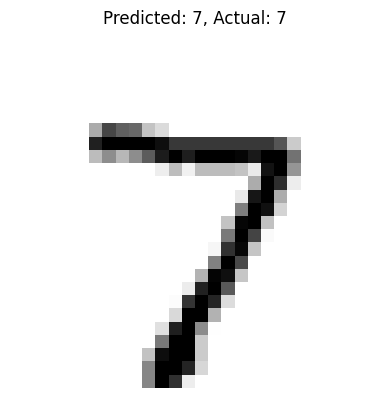

######################################


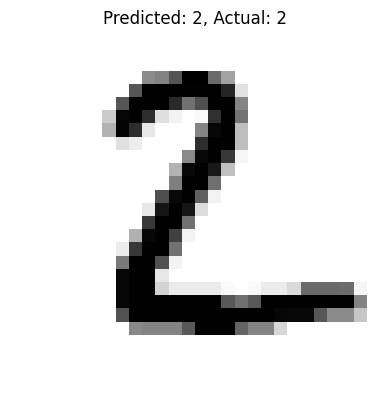

######################################


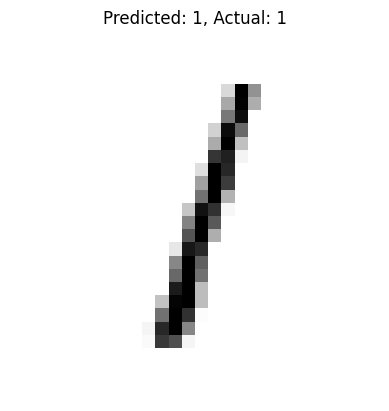

######################################


In [60]:
# plot
for data, pred, actual_data in zip(X_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################################")